In [6]:
from Uplift_PDF import PDF
from Uplift_PDF import report_data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from tnorma import tnorma
from glob import glob
from pylab import rcParams
import os
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
rcParams['figure.figsize'] = 12,4
rcParams['savefig.dpi'] = 300
from tqdm import tqdm
logo_path = 'imagefile/'
from pylab import rcParams

rcParams['figure.figsize'] = 12,4
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

now = datetime.now().strftime('%Y%m%d')

In [7]:
day = '20240213'
store = f'data/{day}/process/report'

file_list = [i.replace('\\','/') for i in sorted(glob(f'data/{day}/process/*csv'))]
fname = [f"{os.path.basename(i).split('.')[0]}" for i in file_list]
fname

['n51_005_right_72_178_129',
 'n51_008_right_72_178_128',
 'n51_011_right_72_178_132',
 'n52_004_right_73_170_115',
 'n52_005_right_73_170_115',
 'n52_006_right_73_170_115',
 'n53_009_right_65_165_110',
 'n53_011_right_65_165_111',
 'n53_024_right_65_165_110',
 'n54_029_right_82_184_125',
 'n55_001_right_78_182_111',
 'n55_005_right_78_182_111',
 'n55_006_right_78_182_112',
 'n56_004_right_61_175_108',
 'n56_005_right_61_175_108',
 'n56_013_right_61_175_108',
 'n57_001_left_68_175_119',
 'n57_003_left_68_175_119',
 'n57_009_left_68_175_119',
 'n58_001_right_84_184_129',
 'n58_006_right_84_184_130',
 'n58_015_right_84_184_130',
 'n59_002_right_68_174_121',
 'n59_014_right_68_174_121',
 'n59_015_right_68_174_122',
 'n60_006_right_72_185_134',
 'n60_012_right_72_185_135',
 'n60_017_right_72_185_134',
 'n61_001_right_58_170_120',
 'n61_003_right_58_170_121',
 'n61_020_right_58_170_120',
 'n62_003_right_82_182_115',
 'n62_005_right_82_182_113',
 'n62_013_right_82_182_113',
 'n63_016_right_5

In [8]:
file_list = ['data/20240213/process/n51_011_right_72_178_132.0.csv',
  'data/20240213/process/n52_004_right_73_170_115.0.csv',
 'data/20240213/process/n53_011_right_65_165_111.0.csv',
 'data/20240213/process/n54_029_right_82_184_125.0.csv',
 'data/20240213/process/n55_006_right_78_182_112.0.csv',
 'data/20240213/process/n57_003_left_68_175_119.0.csv',
 'data/20240213/process/n58_015_right_84_184_130.0.csv',
 'data/20240213/process/n59_015_right_68_174_122.0.csv',
 'data/20240213/process/n60_012_right_72_185_135.0.csv',
 'data/20240213/process/n61_003_right_58_170_121.0.csv',
 'data/20240213/process/n62_003_right_82_182_115.0.csv',
 'data/20240213/process/n63_019_right_55_165_91.0.csv',
 'data/20240213/process/n64_008_left_70_172_120.0.csv',
 'data/20240213/process/n65_006_right_83_178_119.0.csv',
 'data/20240213/process/n66_028_right_70_178_120.0.csv']

fname = [f"{os.path.basename(i).split('.')[0]}" for i in file_list]

In [4]:
kine_data = {}
for k, n in zip(file_list, fname):
    kine_data[n] = k

  7%|▋         | 1/15 [00:09<02:14,  9.63s/it]


KeyboardInterrupt: 

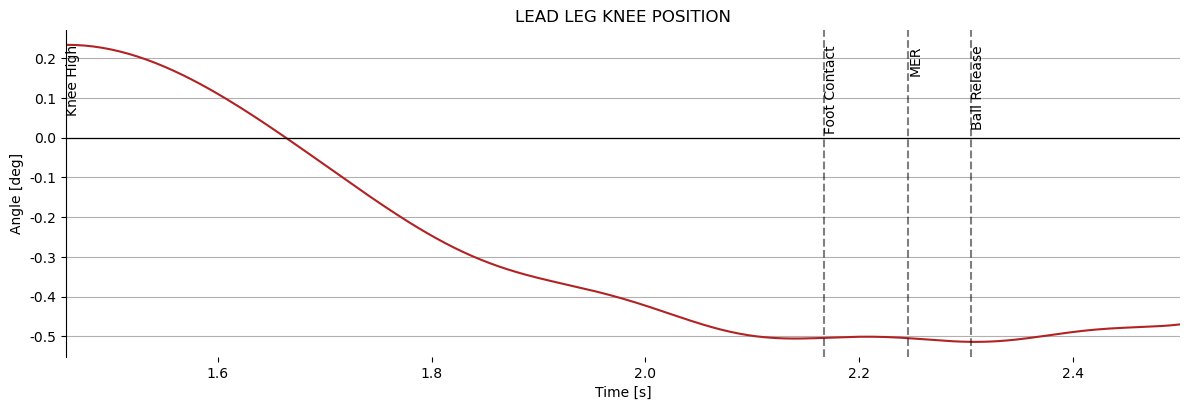

In [5]:
class PDF(PDF):
    def header(self):
        # Logo
        self.set_font('helvetica', 'I', 8)
        self.cell(0, -10, 'Next Level Pitching Report', ln = True)

    # Page footer
    def footer(self):
        # Set position of the footer
        self.set_y(-15)
        # set font
        self.set_font('helvetica', 'I', 8)
        # Page number
        self.cell(0, 10, f"Page {self.page_no()}" + "/" +f"{{nb}}", align = "C")
        # Logo
        self.image(f'{logo_path}/logo.png',
                   160, 280, 50)
    
    # Adding chapter title to start of each chapter
    def chapter_title(self, ch_num, ch_title):
        # set font
        self.set_font('helvetica', '', 12)
        # background color
        self.set_fill_color(0, 128, 0)
        self.set_text_color(255, 255, 255)
        # Chapter title
        chapter_title = f'Chapter {ch_num} : {ch_title}'
        self.cell(0, 5, chapter_title, ln=1, fill=1)
        # line break
        self.ln()

    # Chapter content
    def chapter_body(self):
        # end each chapter
        self.set_font('helvetica', 'I', 12)
        self.cell(0, 5, 'END OF CHAPTER')

    def print_chapter(self, ch_num, ch_title):
        self.add_page()
        self.chapter_title(ch_num, ch_title)
        self.chapter_body()
        
ks_cols = {
    'pelvis_rotational_velocity_with_respect_to_ground'  : ['PELVIS', 'r'],
    'trunk_rotational_velocity_with_respect_to_ground'   : ['TORSO', 'g'],
    'lead_arm_rotational_velocity_with_respect_to_ground': ['ELBOW','b'],
}
#     'lead_shoulder_external_rotation_velocity'           : ['SHOULDER', 'y'],

ang_cols = {
    'trunk_twist_clockwise'               : 'Hip-Shoulder Separation',
    'lead_elbow_flexion'                  : 'ELBOW FLEXION',
    'lead_shoulder_external_rotation'     : 'SHOULDER EXTERNAL ROTATION',          
    'lead_shoulder_horizontal_adduction'  : 'SHOULDER HORIZONTAL ABDUCTION',
    'lead_knee_extension_velocity'        : 'LEAD LEG KNEE EXTENSION ANGULAR VELOCITY',
    'lead_shoulder_adduction'             : 'SHOULDER ABDUCTION', 
    'lead_knee_extension'                 : 'LEAD LEG KNEE FLEXION',
    'trunk_lateral_flexion_right'         : 'TRUNK LATERAL TILT',
    'head_hand_distance'                  : 'HEAD HAND DISTANCE',
    'lead_knee_jc_3d_y'                   : 'LEAD LEG KNEE POSITION',
    'pelvis_3d_y'                         : 'PELVIS POSITION',
    'shank_angle'                         : 'SHANK ANGLE'
    }

hig_cols = {
    'lead_knee_jc_3d_y'                   : ['KNEE', 'darkblue'],
    'pelvis_3d_y'                         : ['PELVIS'   , 'firebrick'],
}


for name in tqdm(kine_data):
    kine = kine_data[name]

    k_df = pd.read_csv(kine)

    k_sr = 240
    k_kh_time = k_df['kh_time'][0]
    k_kh_time1 = k_df['kh_time'][0] - k_kh_time
    k_fc_time = k_df['fc_time'][0] - k_kh_time
    k_mer_time = k_df['mer_time'][0] - k_kh_time
    k_br_time = k_df['br_time'][0] - k_kh_time

    k_df = k_df.iloc[k_kh_time:int(k_br_time + k_kh_time + (k_sr * 0.2)),:].reset_index(drop=True)

    k_df.drop(['kh_time','fc_time','mer_time','br_time'], axis=1, inplace=True)

    k_len = len(k_df)
    k_time = k_df['time']
    k_fc_br = k_br_time - k_fc_time

    hig = report_data.high(k_df, hig_cols, k_time, k_kh_time1, k_fc_time, k_mer_time, k_br_time)
    ang = report_data.one_angle(k_df, ang_cols, k_time, k_kh_time1, k_fc_time, k_mer_time, k_br_time)
    ks  = report_data.kinematic_sequence(k_df, ks_cols, k_time, k_fc_time, k_mer_time, k_br_time)
    report_data.kinematic_sequence_comparison_bar_individual(k_df)
    #report_data.kinematic_sequence_comparison_radar_individual(k_df)

    pdf = PDF("P", "mm","A4")
    pdf.set_auto_page_break(auto = True, margin = 15)    
    # main page
    pdf.add_page()
    pdf.set_font('helvetica', 'BU', 20)
    title = '2024 Next-Level Training Camp'
    pdf.ln(5)
    title_w = pdf.get_string_width(title) + 5
    doc_w = pdf.w
    # pdf.set_x((doc_w - title_w) / 2)
    pdf.cell(0, 20, title, align = 'C', ln = True)
    pdf.set_fill_color(200, 220, 255)

    # ===========================================================================================================
    # chapter
    player, trial, side, weight, height, ballspeed= name.split('_')
    if side == 'right':
        side = 'Right'
    elif side == 'left':
        side = 'Left'
        
    ch1_link = pdf.add_link()
    ch2_link = pdf.add_link()
    ch3_link = pdf.add_link()
    ch4_link = pdf.add_link()
    ch5_link = pdf.add_link()
    ch6_link = pdf.add_link()
    ch7_link = pdf.add_link()
    ch8_link = pdf.add_link()
    ch9_link = pdf.add_link()
    ch10_link = pdf.add_link()
    ch11_link = pdf.add_link()
    ch12_link = pdf.add_link()
    ch13_link = pdf.add_link()
    
    pdf.set_font('helvetica', 'B', 8)
    pdf.cell(0, 2,"",ln=1,align = '')
    pdf.cell(0, 0, f"Name : {player}    Date : {day}   Hand : {side}    Ball Velocity : {ballspeed} km/h   Weight : {weight}kg    Height : {height} cm", align = 'C', ln = True)
    pdf.cell(0, 10,"",ln=1,align = '')
    pdf.image(f'imagefile/analysis.png',x= 30,w=150,h=55)
    pdf.set_font('helvetica', 'B', 10)
    pdf.cell(0,7,"",ln=1,align = '')

    pdf.cell(0, 7, 'PITCHING EFFICIENCY', ln = 1, align = '',link = ch1_link, fill = True)
    pdf.set_font('helvetica', 'B', 10)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '1. KINEMATIC SEQUENCE', ln = 1, align = '', link = ch1_link)
    pdf.cell(0,3,"",ln=1,align = '')

    pdf.cell(0, 7, 'STRIDE', ln = 1, align = '',link = ch1_link, fill = True)
    pdf.set_font('helvetica', 'B', 10)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '1. HEIGHT OF KNEE AND PELVIS', ln = 1, align = '', link = ch2_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '2. HIP/SHOULDER SEPARATION', ln = 1, align = '', link = ch3_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '3. ELBOW FLEXION', ln = 1, align = '', link = ch3_link)
    pdf.cell(0,3,"",ln=1,align = '')

    pdf.cell(0, 7, 'ARM COCKING', ln = 1, align = '',link = ch1_link, fill = True)
    pdf.set_font('helvetica', 'B', 10)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '1. SHANK LATERAL TILT', ln = 1, align = '', link = ch2_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '2. PELVIS HEIGHT', ln = 1, align = '', link = ch3_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '3. SHOULDER EXTERNAL ROTATION', ln = 1, align = '', link = ch3_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '4. SHOULDER HORIZONTAL ABDUCTION', ln = 1, align = '', link = ch7_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '5. LEAD LEG KNEE FLEXION', ln = 1, align = '', link = ch9_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '6. LEAD LEG KNEE EXTENSION ANGULAR VELOCITY', ln = 1, align = '', link = ch10_link)
    pdf.cell(0,3,"",ln=1,align = '')

    pdf.cell(0, 7, 'ARM ACCELERATION', ln = 1, align = '',link = ch1_link, fill = True)
    pdf.set_font('helvetica', 'B', 10)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '1. HEAD HAND DISTANCE', ln = 1, align = '', link = ch12_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '2. SHOULDER ABDUCTION', ln = 1, align = '', link = ch8_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '3. TRUNK LATERAL TILT', ln = 1, align = '', link = ch11_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '4. LEAD LEG KNEE FLEXION', ln = 1, align = '', link = ch9_link)
    pdf.cell(0,2,"",ln=1,align = '')
    pdf.cell(0, 7, '5. LEAD LEG KNEE EXTENSION ANGULAR VELOCITY', ln = 1, align = '', link = ch10_link)
    pdf.cell(0,2,"",ln=1,align = '')

    # ===========================================================================================================
    
    # kinematic sequence

    peak_pel = round(ks['peak']['pelvis_rotational_velocity_with_respect_to_ground']); time_pel = ks['time']['pelvis_rotational_velocity_with_respect_to_ground']
    peak_tor = round(ks['peak']['trunk_rotational_velocity_with_respect_to_ground']);time_tor = ks['time']['trunk_rotational_velocity_with_respect_to_ground']
    peak_elb = round(ks['peak']['lead_arm_rotational_velocity_with_respect_to_ground']);time_elb = ks['time']['lead_arm_rotational_velocity_with_respect_to_ground']
    #peak_sho = round(ks['peak']['lead_shoulder_external_rotation_velocity']);time_sho = ks['time']['lead_shoulder_external_rotation_velocity']

    total_time = k_br_time - k_fc_time
    pel_time = round(100 * (time_pel - k_fc_time) / total_time)
    tor_time = round(100 * (time_tor - k_fc_time) / total_time)
    elb_time = round(100 * (time_elb - k_fc_time) / total_time)
    #sho_time = round(100 * (time_sho - k_fc_time) / total_time)
    
    tor_gain = round(peak_tor / peak_pel,2)
    upper_gain = round(peak_elb / peak_tor,2)
    #fore_gain = round(peak_sho / peak_elb,2)

    pdf.add_page()
    pdf.set_link(ch1_link, page = 2)
    pdf.set_y(15)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'KINEMATIC SEQUENCE', ln = True)
    pdf.set_y(21)
    pdf.set_font('helvetica', 'I', 10)
    pdf.image(f'figure/kinematic.png',x=65,y=20,w=140,h=60)
    if side == 'Right':
        pdf.image(f'imagefile/R/kinematic.png',x=10,y=20,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/kinematic.png',x=10,y=20,w=50,h=50)

    data_as_dict = {"Segment"                 : ["Pelvic",      "Torso",       "Elbow"],
                    "Major League"            : ["475 ~ 550", "600 ~ 800","2500 ~ 4500"],
                    "Peak Velocity"           : [peak_pel, peak_tor, peak_elb],
                    "Timing [BC - FC (100%)]" : [f"{pel_time} %", f"{tor_time} %",f"{elb_time} %"],
                    "Speed Gain"              : [''      , tor_gain,upper_gain]}
    pdf.set_y(95)

    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Kinematic Sequence',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [30,40,35,55,40],
                    x_start='C')
    
    # ===========================================================================================================

    # HEIGHT OF KNEE AND PELVIS : AT KNEE HEIGHT
        
    pdf.set_font('helvetica', 'B', 15)
    pdf.set_y(160)
    pdf.cell(190, 10, 'STRIDE', align = 'C', ln = True, fill = True)
    
    pdf.set_link(ch2_link, page = 2)
    pdf.set_y(180)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'HEIGHT OF KNEE AND PELVIS', ln = True)
    pdf.set_y(186)
    pdf.set_font('helvetica', 'I', 10)
    pdf.image(f'figure/hig.png',x=70,y=185,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/KNEEHIGH.png',x=10,y=185,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/KNEEHIGH.png',x=10,y=185,w=50,h=50)

    kn_max = round(ang['max']['lead_knee_jc_3d_y'],2)  # 최댓값
    pel_max = round(ang['max']['pelvis_3d_y'],2)

    data_as_dict = {
                    "Segment"             : ["Knee", "Pelvis"],
                    "at Knee High"        : [hig['kh_time']['lead_knee_jc_3d_y'],hig['kh_time']['pelvis_3d_y']],
                    "Max"                 : [kn_max, pel_max],
                    }
        
    pdf.set_y(240)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Height of knee and pelvis',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [63, 63, 63],
                    x_start='C')
    
    # ===========================================================================================================

    # HIP/SHOULDER SEPARATION

    pdf.add_page()

    pdf.set_link(ch4_link, page = 3)
    pdf.set_y(15)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'HIP/SHOULDER SEPARATION', ln = True)
    pdf.set_y(21)
    pdf.set_font('helvetica', 'I', 10)
    pdf.image(f'figure/Hip-Shoulder Separation.png',x=70,y=20,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/Hip-Shoulder Separation.png',x=10,y=20,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/Hip-Shoulder Separation.png',x=10,y=20,w=50,h=50)

    HS_fc = round(ang['fc_time']['trunk_twist_clockwise'])
    HS_max = round(ang['fc_br']['trunk_twist_clockwise'].min()) 
    HS_max_t = round(100 * (ang['fc_br_min']['trunk_twist_clockwise'] - k_fc_time) / k_fc_br)

    data_as_dict = {
                    "at Foot Contact" : [HS_fc],
                    "Min"        : [HS_max],
                    "Min Timing [BC - FC (100%)]" : [f"{HS_max_t} %"],
                    }
    pdf.set_y(75)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Hip-Shoulder Separation',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [63,63,63],
                    x_start='C')
    
    report_data.create_bullet_chart('Hip Shoulder Separation (FC)', "FC", HS_fc, -60, -39, -25, 0, unit='°')
    pdf.image(f'figure/bar//Hip Shoulder Separation (FC)_bar.png', -15, 100, 235,)

    # ===========================================================================================================
    
    # ELBOW FLEXION

    pdf.set_link(ch5_link, page = 3)
    pdf.set_y(150)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'ELBOW FLEXION', ln = True)
    pdf.set_y(156)
    pdf.set_font('helvetica','i',10)
    pdf.image(f'figure/ELBOW FLEXION.png',x=70,y=155,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/ELBOW FLEXION.png',x=10,y=155,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/ELBOW FLEXION.png',x=10,y=155,w=50,h=50)

    EF_fc = round(ang['fc_time']['lead_elbow_flexion'])
    EF_max = round(ang['fc_br']['lead_elbow_flexion'].max())  # 최댓값
    EF_max_t = round(100 * (ang['fc_br_max']['lead_elbow_flexion'] - k_fc_time) / k_fc_br)
    
    data_as_dict = {
                    "at Foot Contact" : [EF_fc],
                    "Max"        : [EF_max],
                    "Max Timing [BC - FC (100%)]" : [f"{EF_max_t} %"],
                    }
    
    pdf.set_y(210)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Elbow Flexion',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [63,63,63],
                    x_start='C')

    report_data.create_bullet_chart('Elbow Flexion (FC)', "FC", EF_fc, 50, 76, 115, 140, unit='°')
    pdf.image(f'figure/bar//Elbow Flexion (FC)_bar.png', -15, 235, 235,)

    # ===========================================================================================================

    pdf.add_page()
    
    pdf.set_font('helvetica', 'B', 15)
    pdf.set_y(10)
    pdf.cell(190, 10, 'Arm cocking', align = 'C', ln = True, fill = True)

    # shank_angle
    
    pdf.set_link(ch3_link, page = 4)
    pdf.set_y(30)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'SHANK LATERAL TILT', ln = True)
    pdf.set_y(36)
    pdf.set_font('helvetica', 'I', 10)
    pdf.image(f'figure/SHANK ANGLE.png',x=70,y=35,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/tibi.png',x=10,y=35,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/tibi.png',x=10,y=35,w=50,h=50)
    
    SA_kh = round(ang['kh_time']['shank_angle'],2)
    SA_fc = round(ang['fc_time']['shank_angle'],2)

    data_as_dict = {
                    "at Knee High"    : [SA_kh],
                    "at Foot Contact" : [SA_fc],
                    }
    pdf.set_y(90)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'shank angle',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [94.5,94.5],
                    x_start='C')
    
    # ===========================================================================================================

    # PELVIS HEIGHT

    pdf.set_link(ch2_link, page = 4)
    pdf.set_y(160)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'PELVIS HEIGHT', ln = True)
    pdf.set_y(166)
    pdf.set_font('helvetica', 'I', 10)
    pdf.image(f'figure/hig.png',x=70,y=165,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/KNEEHIGH.png',x=10,y=165,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/KNEEHIGH.png',x=10,y=165,w=50,h=50)

    data_as_dict = {
                    "Segment"             : ["Pelvis"],
                    "at Foot Contact"     : [hig['fc_time']['pelvis_3d_y']],
                    "at Max SER"          : [hig['mer_time']['pelvis_3d_y']],
                    "Max"                 : [pel_max],
                    }
        
    pdf.set_y(220)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'pelvis Height',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [45,45,45,45],
                    x_start='C')

    # ===========================================================================================================
    pdf.add_page()

    # SHOULDER EXTERNAL ROTATION

    pdf.set_link(ch6_link, page = 5)
    pdf.set_y(15)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'SHOULDER EXTERNAL ROTATION', ln = True)
    pdf.set_y(21)
    pdf.set_font('helvetica','i',10)
    pdf.image(f'figure/SHOULDER EXTERNAL ROTATION.png',x=70,y=20,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/SHOULDER EXTERNAL ROTATION.png',x=10,y=20,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/SHOULDER EXTERNAL ROTATION.png',x=10,y=20,w=50,h=50)

    SER_fc = round(ang['fc_time']['lead_shoulder_external_rotation'])
    SER_mer = round(ang['mer_time']['lead_shoulder_external_rotation'])
    
    SER_max = round(ang['fc_br']['lead_shoulder_external_rotation'].max())  # 최댓값
    SER_max_t = round(100 * (ang['fc_br_max']['lead_shoulder_external_rotation'] - k_fc_time) / k_fc_br)

    data_as_dict = {
                    "at Foot Contact" : [SER_fc],
                    "at Max ER"       : [SER_mer],
                    "Max"             : [SER_max],
                    "Max Timing [BC - FC (100%)]" : [f"{SER_max_t} %"],
                    }

    pdf.set_y(75)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Shoulder External Rotation',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [45,45,45,45],
                    x_start='C')
    
    report_data.create_bullet_chart('Shoulder External Rotation (FC)', "FC", SER_fc, 0, 11, 48, 90, unit='°')
    pdf.image(f'figure/bar//Shoulder External Rotation (FC)_bar.png', -15, 100, 235,)

    report_data.create_bullet_chart('Shoulder External Rotation (MER)', "MER", SER_mer, 120, 163, 178, 250, unit='°')
    pdf.image(f'figure/bar//Shoulder External Rotation (MER)_bar.png', -15, 115, 235,)
    
    # ===========================================================================================================
    
    # SHOULDER HORIZONTAL ABDUCTION

    pdf.set_link(ch7_link, page = 5)
    pdf.set_y(150)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'SHOULDER HORIZONTAL ABDUCTION', ln = True)
    pdf.set_y(156)
    pdf.set_font('helvetica','i',10)
    pdf.image(f'figure/SHOULDER HORIZONTAL ABDUCTION.png',x=70,y=155,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/SHOULDER HORIZONTAL ABDUCTION.png',x=10,y=155,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/SHOULDER HORIZONTAL ABDUCTION.png',x=10,y=155,w=50,h=50)

    SHA_fc = round(ang['fc_time']['lead_shoulder_horizontal_adduction'])
    SHA_mer = round(ang['mer_time']['lead_shoulder_horizontal_adduction'])
    SHA_max = round(ang['fc_br']['lead_shoulder_horizontal_adduction'].max())  # 최댓값
    SHA_max_t = round(100 * (ang['fc_br_max']['lead_shoulder_horizontal_adduction'] - k_fc_time) / k_fc_br)
    
    data_as_dict = {
                    "at Foot Contact" : [SHA_fc],
                    "at Max ER"       : [SHA_mer],
                    "Max"        : [SHA_max],
                    "Max Timing [BC - FC (100%)]" : [f"{SHA_max_t} %"],
                    }

    pdf.set_y(210)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Shoulder Horizontal Abduction',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [45,45,45,45],
                    x_start='C')
    
    report_data.create_bullet_chart('Shoulder Horizontal Abduction (FC)', "FC", SHA_fc, -100, -63, -24, 10, unit='°')
    pdf.image(f'figure/bar//Shoulder Horizontal Abduction (FC)_bar.png', -15, 235, 235,)

    report_data.create_bullet_chart('Shoulder Horizontal Abduction (MER)', "MER", SHA_mer, -50, -12, 9, 30, unit='°')
    pdf.image(f'figure/bar//Shoulder Horizontal Abduction (MER)_bar.png', -15, 250, 235,)

    # ===========================================================================================================
    pdf.add_page()

    # LEAD LEG KNEE FLEXION

    pdf.set_link(ch10_link, page = 6)
    pdf.set_y(15)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'LEAD LEG KNEE FLEXION', ln = True)
    pdf.set_y(21)
    pdf.set_font('helvetica','i',10)
    pdf.image(f'figure/LEAD LEG KNEE FLEXION.png',x=70,y=20,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/LEAD LEG KNEE FLEXION.png',x=10,y=20,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/LEAD LEG KNEE FLEXION.png',x=10,y=20,w=50,h=50)
    
    LKF_fc = round(ang['fc_time']['lead_knee_extension'])
    LKF_mer = round(ang['mer_time']['lead_knee_extension'])
    LKF_max = round(ang['fc_br']['lead_knee_extension'].max())  # 최댓값
    LKF_max_t = round(100 * (ang['fc_br_max']['lead_knee_extension'] - k_fc_time) / k_fc_br)
    
    data_as_dict = {
                    "at Foot Contact" : [LKF_fc],
                    "at Max ER"       : [LKF_mer],
                    "Max"        : [LKF_max],
                    "Max Timing [BC - FC (100%)]" : [f"{LKF_max_t} %"],
                    }

    pdf.set_y(75)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Lead Leg Knee Flexion',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [45,45,45,45],
                    x_start='C')
    
    report_data.create_bullet_chart('Lead Leg Knee Flexion (FC)', "FC", LKF_fc, 20, 39, 66, 100, unit='°')
    pdf.image(f'figure/bar/Lead Leg Knee Flexion (FC)_bar.png', -15, 100, 235,)

    report_data.create_bullet_chart('Lead Leg Knee Flexion (MER)', "MER", LKF_mer, 0, 35, 57, 90, unit='°')
    pdf.image(f'figure/bar/Lead Leg Knee Flexion (MER)_bar.png', -15, 115, 235,)

    # ===========================================================================================================

    # LEAD LEG KNEE EXTENSION ANGULAR VELOCITY

    pdf.set_link(ch9_link, page = 6)
    pdf.set_y(150)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'LEAD LEG KNEE EXTENSION ANGULAR VELOCITY', ln = True)
    pdf.set_y(156)
    pdf.set_font('helvetica','i',10)
    pdf.image(f'figure/LEAD LEG KNEE EXTENSION ANGULAR VELOCITY.png',x=70,y=155,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/LEAD LEG KNEE EXTENSION ANGULAR VELOCITY.png',x=10,y=155,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/LEAD LEG KNEE EXTENSION ANGULAR VELOCITY.png',x=10,y=155,w=50,h=50)
    
    KEAV_mer = round(ang['mer_time']['lead_knee_extension_velocity'])
    KEAV_max = round(ang['fc_br']['lead_knee_extension_velocity'].max())  # 최댓값
    KEAV_max_t = round(100 * (ang['fc_br_max']['lead_knee_extension_velocity'] - k_fc_time) / k_fc_br)

    data_as_dict = {
                    "at Max ER"       : [KEAV_mer],
                    "Max"        : [KEAV_max],
                    "Max Timing [BC - FC (100%)]" : [f"{KEAV_max_t} %"],
                    }

    pdf.set_y(210)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Lead Leg Knee Extension Angular Velocity',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [63,63,63],
                    x_start='C')
    
    report_data.create_bullet_chart('Lead Leg Knee Extension Angular Velocity (MAX)', "MAX", KEAV_max, 0, 218, 502, 800, unit='°/s')
    pdf.image(f'figure/bar/Lead Leg Knee Extension Angular Velocity (MAX)_bar.png', -15, 235, 235,)
    
    # ===========================================================================================================
    pdf.add_page()
    
    pdf.set_font('helvetica', 'B', 15)
    pdf.set_y(10)
    pdf.cell(190, 10, 'Arm acceleration', align = 'C', ln = True, fill = True)

    # HEAD HAND DISTANCE

    pdf.set_link(ch12_link, page = 7)
    pdf.set_y(30)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'HEAD HAND DISTANCE', ln = True)
    pdf.set_y(36)
    pdf.set_font('helvetica','i',10)
    pdf.image(f'figure/HEAD HAND DISTANCE.png',x=70,y=35,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/HEAD.png',x=10,y=35,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/HEAD.png',x=10,y=35,w=50,h=50)
    
    HHD_br = round(ang['br_time']['head_hand_distance'],2)

    data_as_dict = {
                    "at Ball Release"  : [HHD_br]
                    }

    pdf.set_y(90)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'head_hand_distance',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [190],
                    x_start='C')
    
    # ===========================================================================================================

    # SHOULDER ABDUCTION

    pdf.set_link(ch8_link, page = 7)
    pdf.set_y(160)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'SHOULDER ABDUCTION', ln = True)
    pdf.set_y(166)
    pdf.set_font('helvetica','i',10)
    pdf.image(f'figure/SHOULDER ABDUCTION.png',x=70,y=165,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R//SHOULDER ABDUCTION.png',x=10,y=165,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L//SHOULDER ABDUCTION.png',x=10,y=165,w=50,h=50)

    SAB_br = round(ang['br_time']['lead_shoulder_adduction'])
    SAB_max = round(ang['fc_br']['lead_shoulder_adduction'].max())  # 최댓값
    SAB_max_t = round(100 * (ang['fc_br_max']['lead_shoulder_adduction'] - k_fc_time) / k_fc_br)

    data_as_dict = {
                    "at Ball Release"  : [SAB_br],
                    "Max"        : [SAB_max],
                    "Max Timing [BC - FC (100%)]" : [f"{SAB_max_t} %"],
                    }

    pdf.set_y(220)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Shoulder Abduction',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [63,63,63],
                    x_start='C')
    
    report_data.create_bullet_chart('Shoulder Abduction (BR)', "BR", SAB_br, 50, 81, 99, 120, unit='°')
    pdf.image(f'figure/bar//Shoulder Abduction (BR)_bar.png', -15, 245, 235,)

    # ===========================================================================================================
    pdf.add_page()

    # TRUNK LATERAL TILT

    pdf.set_link(ch11_link, page = 8)
    pdf.set_y(15)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'TRUNK LATERAL TILT', ln = True)
    pdf.set_y(21)
    pdf.set_font('helvetica','i',10)
    #pdf.cell(0,0,'Internal and external rotation of the lead shoulder')
    pdf.image(f'figure/TRUNK LATERAL TILT.png',x=70,y=20,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/TRUNK LATERAL TILT.png',x=10,y=20,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/TRUNK LATERAL TILT.png',x=10,y=20,w=50,h=50)
    
    TLT_br = round(ang['br_time']['trunk_lateral_flexion_right'])
    TLT_max = round(ang['fc_br']['trunk_lateral_flexion_right'].max())  # 최댓값
    TLT_max_t = round(100 * (ang['fc_br_max']['trunk_lateral_flexion_right'] - k_fc_time) / k_fc_br)

    data_as_dict = {
                    "at Ball Release"  : [TLT_br],
                    "Max"              : [TLT_max],
                    "Max Timing [BC - FC (100%)]" : [f"{TLT_max_t} %"],
                    }

    pdf.set_y(75)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Trunk Lateral Tilt',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [63,63,63],
                    x_start='C')
    
    report_data.create_bullet_chart('Trunk Lateral Tilt (BR)', "BR", TLT_br, -20, 9, 23, 50, unit='°')
    pdf.image(f'figure/bar/Trunk Lateral Tilt (BR)_bar.png', -15, 100, 235,)

    # ===========================================================================================================

    # LEAD LEG KNEE FLEXION

    pdf.set_link(ch10_link, page = 8)
    pdf.set_y(150)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'LEAD LEG KNEE FLEXION', ln = True)
    pdf.set_y(156)
    pdf.set_font('helvetica','i',10)
    pdf.image(f'figure/LEAD LEG KNEE FLEXION.png',x=70,y=155,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/LEAD LEG KNEE FLEXION.png',x=10,y=155,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/LEAD LEG KNEE FLEXION.png',x=10,y=155,w=50,h=50)
    
    LKF_br = round(ang['br_time']['lead_knee_extension'])
    LKF_max = round(ang['fc_br']['lead_knee_extension'].max())  # 최댓값
    LKF_max_t = round(100 * (ang['fc_br_max']['lead_knee_extension'] - k_fc_time) / k_fc_br)
    
    data_as_dict = {
                    "at Ball Release" : [LKF_br],
                    "Max"        : [LKF_max],
                    "Max Timing [BC - FC (100%)]" : [f"{LKF_max_t} %"],
                    }

    pdf.set_y(210)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Lead Leg Knee Flexion',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [63,63,63],
                    x_start='C')

    report_data.create_bullet_chart('Lead Leg Knee Flexion (BR)', "BR", LKF_br, 0, 25, 53, 90, unit='°')
    pdf.image(f'figure/bar/Lead Leg Knee Flexion (BR)_bar.png', -15, 235, 235,)

    # ===========================================================================================================
    pdf.add_page()

    # LEAD LEG KNEE EXTENSION ANGULAR VELOCITY

    pdf.set_link(ch9_link, page = 9)
    pdf.set_y(15)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 0, 'LEAD LEG KNEE EXTENSION ANGULAR VELOCITY', ln = True)
    pdf.set_y(21)
    pdf.set_font('helvetica','i',10)
    pdf.image(f'figure/LEAD LEG KNEE EXTENSION ANGULAR VELOCITY.png',x=70,y=20,w=130,h=50)
    if side == 'Right':
        pdf.image(f'imagefile/R/LEAD LEG KNEE EXTENSION ANGULAR VELOCITY.png',x=10,y=20,w=50,h=50)
    elif side == 'Left':
        pdf.image(f'imagefile/L/LEAD LEG KNEE EXTENSION ANGULAR VELOCITY.png',x=10,y=20,w=50,h=50)
    
    KEAV_br = round(ang['br_time']['lead_knee_extension_velocity'])
    KEAV_max = round(ang['fc_br']['lead_knee_extension_velocity'].max())  # 최댓값
    KEAV_max_t = round(100 * (ang['fc_br_max']['lead_knee_extension_velocity'] - k_fc_time) / k_fc_br)

    data_as_dict = {
                    "at Ball Release" : [KEAV_br],
                    "Max"        : [KEAV_max],
                    "Max Timing [BC - FC (100%)]" : [f"{KEAV_max_t} %"],
                    }

    pdf.set_y(75)
    title_size = 8
    pdf.set_font(family='Arial', style='B', size=title_size)
    pdf.create_table(table_data = data_as_dict,
                    title = 'Lead Leg Knee Extension Angular Velocity',
                    title_size=10,
                    align_header = 'C',
                    align_data = 'C',
                    cell_width = [63,63,63],
                    x_start='C')
    
    # ===========================================================================================================

    figure_file = glob('figure/*png')
    for figure in figure_file:
        os.remove(figure)
        
    pdf.output(f'{store}/{day}_{player}_{trial}_{side}_baseball_report.pdf')